# 프로그래머스 강의 리뷰
## 설문조사 응답 분석
* study_url: [프로그래머스 강의 설문조사 응답 분석](https://programmers.co.kr/learn/courses/21/lessons/937)<br>
* refer_github: [corazzon_github](https://github.com/corazzon/KaggleStruggle)
* dataset :[kaggle-survey-2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

https://github.com/corazzon/KaggleStruggle/blob/master/kaggle-survey-2017/Kaggle-ML-DS-survey-2017-EDA-FAQ.ipynb

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

In [4]:
question.head()

Column                                           Question Asked
0      GenderSelect     Select your gender identity. - Selected Choice   All
1    GenderFreeForm  Select your gender identity. - A different ide...   All
2           Country          Select the country you currently live in.   All
3               Age                                   What's your age?   All
4  EmploymentStatus             What's your current employment status?   All

In [3]:
question = pd.read_csv('../input/schema.csv')
question.shape

(290, 3)

In [89]:
mcq = pd.read_csv('../input/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [7]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [8]:
mcq.head()

GenderSelect        Country   Age  \
0  Non-binary, genderqueer, or gender non-conforming            NaN   NaN   
1                                             Female  United States  30.0   
2                                               Male         Canada  28.0   
3                                               Male  United States  56.0   
4                                               Male         Taiwan  38.0   

                                    EmploymentStatus StudentStatus  \
0                                 Employed full-time           NaN   
1                 Not employed, but looking for work           NaN   
2                 Not employed, but looking for work           NaN   
3  Independent contractor, freelancer, or self-em...           NaN   
4                                 Employed full-time           NaN   

  LearningDataScience CodeWriter CareerSwitcher  \
0                 NaN        Yes            NaN   
1                 NaN        NaN            NaN   
2                 NaN        NaN            NaN   
3                 NaN        Yes            NaN   
4                 NaN        Yes            NaN   

              CurrentJobTitleSelect TitleFit              ...                \
0             DBA/Database Engineer     Fine              ...                 
1                               NaN      NaN              ...                 
2                               NaN      NaN              ...                 
3  Operations Research Practitioner   Poorly              ...                 
4                Computer Scientist     Fine              ...                 

  JobFactorExperienceLevel JobFactorDepartment  JobFactorTitle  \
0                      NaN                 NaN             NaN   
1                      NaN                 NaN             NaN   
2           Very Important      Very Important  Very Important   
3                      NaN                 NaN             NaN   
4                      NaN                 NaN             NaN   

  JobFactorCompanyFunding JobFactorImpact JobFactorRemote JobFactorIndustry  \
0                     NaN             NaN             NaN               NaN   
1                     NaN             NaN             NaN               NaN   
2          Very Important  Very Important  Very Important    Very Important   
3                     NaN             NaN             NaN               NaN   
4                     NaN             NaN             NaN               NaN   

  JobFactorLeaderReputation JobFactorDiversity JobFactorPublishingOpportunity  
0                       NaN                NaN                            NaN  
1        Somewhat important                NaN                            NaN  
2            Very Important     Very Important                 Very Important  
3                       NaN                NaN                            NaN  
4                       NaN                NaN                            NaN  

[5 rows x 228 columns]

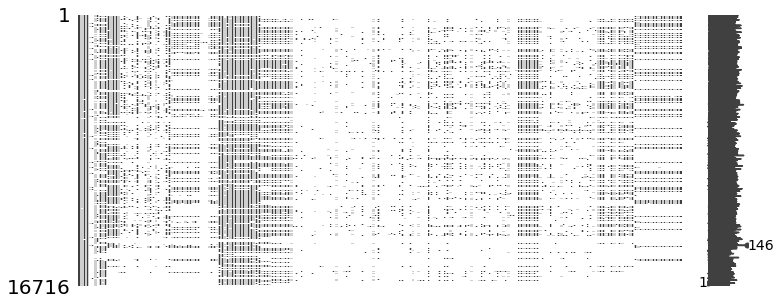

In [10]:
import missingno as msno

msno.matrix(mcq, figsize=(12,5))

# 설문통계

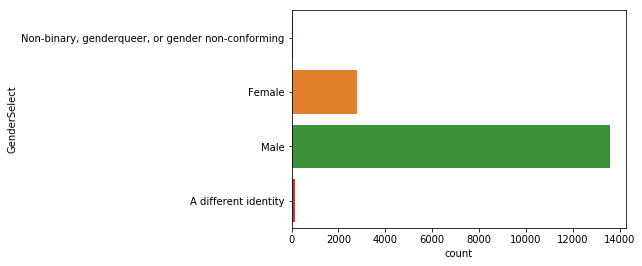

In [11]:
sns.countplot(y='GenderSelect', data=mcq)

In [13]:
con_df = pd.DataFrame(mcq['Country'].value_counts())
con_df.head()

Country
United States      4197
India              2704
Other              1023
Russia              578
United Kingdom      535

In [15]:
con_df['국가'] = con_df.index
con_df.head()

Country              국가
United States      4197   United States
India              2704           India
Other              1023           Other
Russia              578          Russia
United Kingdom      535  United Kingdom

In [16]:
con_df.columns = ['응답수', '국가']
con_df.head()

응답수              국가
United States   4197   United States
India           2704           India
Other           1023           Other
Russia           578          Russia
United Kingdom   535  United Kingdom

In [17]:
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head()

응답수              국가
0  4197   United States
1  2704           India
2  1023           Other
3   578          Russia
4   535  United Kingdom

In [18]:
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

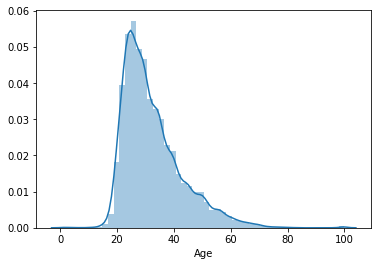

In [19]:
sns.distplot(mcq[mcq['Age'] > 0]['Age'])

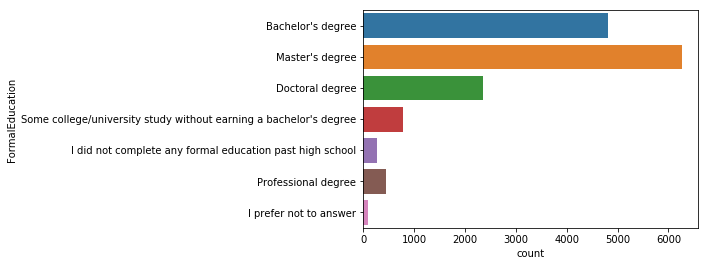

In [20]:
sns.countplot(y='FormalEducation', data=mcq)

In [24]:
mcq_major_count = pd.DataFrame(
    mcq['MajorSelect'].value_counts())
mcq_major_count.head()

MajorSelect
Computer Science                           4397
Mathematics or statistics                  2220
Engineering (non-computer focused)         1339
Electrical Engineering                     1303
Other                                       848

In [25]:
mcq_major_percent = pd.DataFrame(
    mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_percent.head()

MajorSelect
Computer Science                       0.331074
Mathematics or statistics              0.167156
Engineering (non-computer focused)     0.100821
Electrical Engineering                 0.098110
Other                                  0.063851

In [28]:
mcq_major_df = mcq_major_count.merge(
    mcq_major_percent, left_index=True, right_index=True)
mcq_major_df.head()

MajorSelect_x  MajorSelect_y
Computer Science                             4397       0.331074
Mathematics or statistics                    2220       0.167156
Engineering (non-computer focused)           1339       0.100821
Electrical Engineering                       1303       0.098110
Other                                         848       0.063851

In [29]:
mcq_major_df.columns = ['응답 수', '비율']

In [30]:
mcq_major_df

응답 수        비율
Computer Science                                    4397  0.331074
Mathematics or statistics                           2220  0.167156
Engineering (non-computer focused)                  1339  0.100821
Electrical Engineering                              1303  0.098110
Other                                                848  0.063851
Physics                                              830  0.062495
Information technology, networking, or system a...   693  0.052180
A social science                                     531  0.039982
Biology                                              274  0.020631
Management information systems                       237  0.017845
A humanities discipline                              198  0.014909
A health science                                     152  0.011445
Psychology                                           137  0.010315
I never declared a major                              65  0.004894
Fine arts or performing arts                          57  0.004292

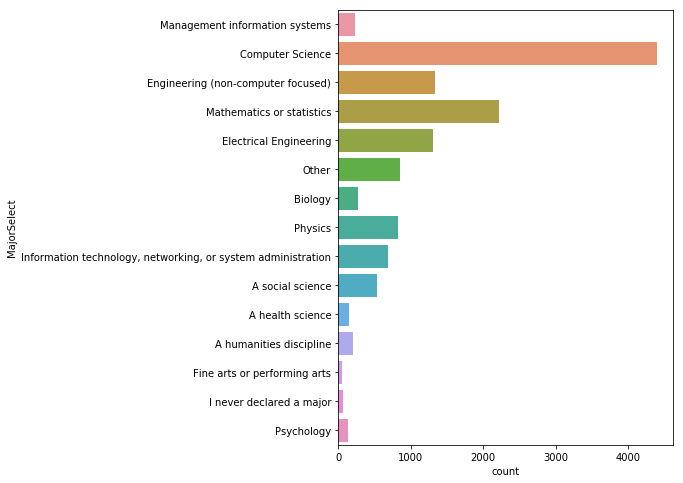

In [31]:
# 재학중인 사람들의 전공 현황
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcq)

In [32]:
# 취업여부
mcq_es_count = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(
    mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

응답 수        비율
Employed full-time                                  10897  0.651890
Not employed, but looking for work                   2110  0.126226
Independent contractor, freelancer, or self-emp...   1330  0.079564
Not employed, and not looking for work                924  0.055276
Employed part-time                                    917  0.054858
I prefer not to say                                   420  0.025126
Retired                                               118  0.007059

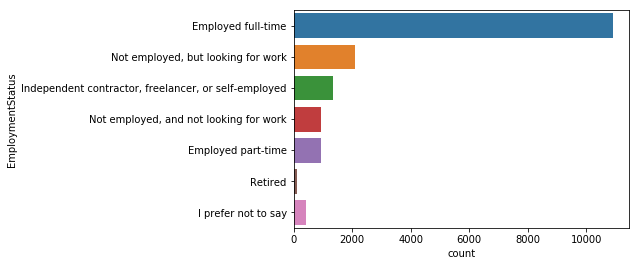

In [33]:
sns.countplot(y='EmploymentStatus', data=mcq)

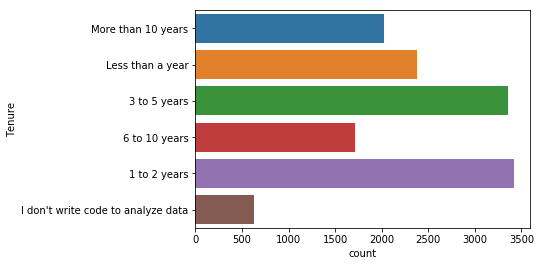

In [34]:
# 프로그래밍 경험
sns.countplot(y='Tenure', data=mcq)

In [35]:
mcq['Tenure'].value_counts()

1 to 2 years                          3424
3 to 5 years                          3355
Less than a year                      2380
More than 10 years                    2028
6 to 10 years                         1714
I don't write code to analyze data     631
Name: Tenure, dtype: int64

The number of interviewees in Korea: 194


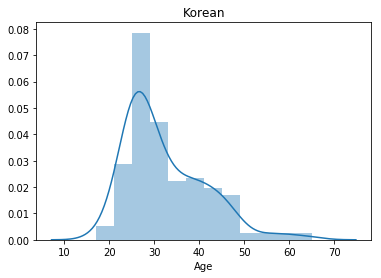

In [36]:
korea = mcq.loc[(mcq['Country']=='South Korea')]
print("The number of interviewees in Korea: " + str(korea.shape[0]))
sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [38]:
korea.head()

GenderSelect      Country   Age    EmploymentStatus StudentStatus  \
356         Male  South Korea  27.0  Employed full-time           NaN   
363       Female  South Korea  36.0  Employed full-time           NaN   
491         Male  South Korea  34.0  Employed part-time           NaN   
565         Male  South Korea  53.0  Employed full-time           NaN   
601         Male  South Korea  35.0  Employed full-time           NaN   

    LearningDataScience CodeWriter CareerSwitcher CurrentJobTitleSelect  \
356                 NaN        Yes            NaN      Business Analyst   
363                 NaN         No            Yes            Researcher   
491                 NaN        Yes            NaN  Scientist/Researcher   
565                 NaN        Yes            NaN            Researcher   
601                 NaN         No            Yes            Programmer   

    TitleFit              ...               JobFactorExperienceLevel  \
356     Fine              ...                                    NaN   
363     Fine              ...                         Very Important   
491      NaN              ...                                    NaN   
565     Fine              ...                                    NaN   
601     Fine              ...                         Very Important   

    JobFactorDepartment  JobFactorTitle JobFactorCompanyFunding  \
356                 NaN             NaN                     NaN   
363      Very Important  Very Important      Somewhat important   
491                 NaN             NaN                     NaN   
565                 NaN             NaN                     NaN   
601       Not important   Not important           Not important   

        JobFactorImpact     JobFactorRemote   JobFactorIndustry  \
356                 NaN                 NaN                 NaN   
363  Somewhat important      Very Important  Somewhat important   
491                 NaN                 NaN                 NaN   
565                 NaN                 NaN                 NaN   
601  Somewhat important  Somewhat important      Very Important   

    JobFactorLeaderReputation  JobFactorDiversity  \
356                       NaN                 NaN   
363             Not important       Not important   
491                       NaN                 NaN   
565                       NaN                 NaN   
601             Not important  Somewhat important   

    JobFactorPublishingOpportunity  
356                            NaN  
363                  Not important  
491                            NaN  
565                            NaN  
601                  Not important  

[5 rows x 228 columns]

In [37]:
pd.DataFrame(korea['GenderSelect'].value_counts())

GenderSelect
Male                           156
Female                          37
A different identity             1

Text(0.5,1,'Korean')

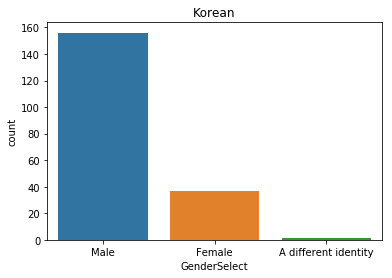

In [40]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

Text(0.5,1,'korean Male')

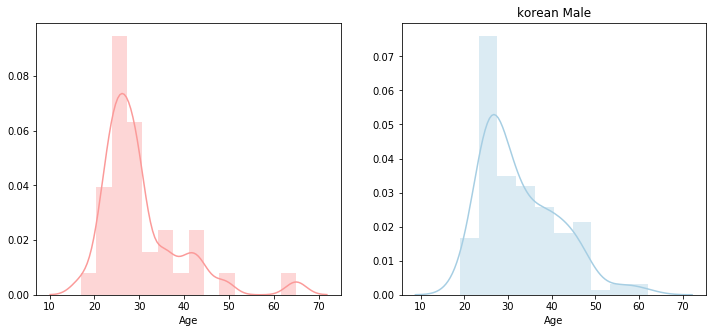

In [43]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('korean Male')

* 여성 데이터는 갯수가 적어 일반화하긴 어렵다. 하지만 20에서 30세 비율이 높은것을 볼 수 있다. 

In [45]:
print("total: ",len(korea['Age'].loc[korea['GenderSelect']=='Male']))
print("total: ",len(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna()))

total:  156
total:  153


In [46]:
print("total: ",len(korea['Age'].loc[korea['GenderSelect']=='Female']))
print("total: ",len(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna()))

total:  37
total:  37


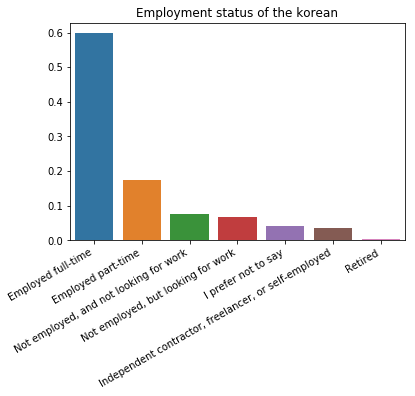

In [48]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right') # 옵션을 줘서 기울기를 줄 수 있다
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

우리나라 kaggler들도 대부분 재직중이다.

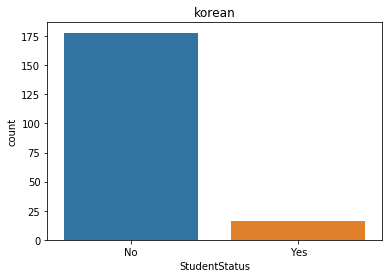

In [49]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

# FAQ

In [57]:
# STATISTICS 
def freq_statistics(df):
    col_names = ['field','uniq_value','dtypes','null_count','cnt_max', 'cnt_min', 'cnt_avg', 'cnt_std', 'cnt_top5', 'cnt_bottom5']
    output_df = pd.DataFrame(columns=col_names)
    columns = list(df.columns)
    for i in range(len(columns)):
        new_list = []

        #field
        new_list.append(columns[i])
        # uniq
        new_list.append(len(df[columns[i]].unique()))
        # dtypes
        new_list.append(str(df[columns[i]].dtypes))
        # null
        new_list.append(df[columns[i]].isnull().sum())
        # max
        new_list.append(max(list(df[columns[i]].value_counts().values)))
        # min
        new_list.append(min(list(df[columns[i]].value_counts().values)))
        # avg
        new_list.append(np.mean(list(df[columns[i]].value_counts().values)))
        # std
        new_list.append(np.std(list(df[columns[i]].value_counts().values)))
        # top10
        new_list.append(str(df[columns[i]].value_counts()[:5].index.values).strip('[]'))
        new_list.append(str(df[columns[i]].value_counts()[-5:].index.values).strip('[]'))

        output_df = output_df.append(pd.DataFrame([new_list], columns=col_names), ignore_index=True)

    output_df = output_df.set_index('field')
    # temp_df.set_index('field', inplace=True)
    return output_df

In [62]:
freq_statistics(mcq.fillna(''))

uniq_value  dtypes null_count  \
field                                                                       
GenderSelect                                         5  object          0   
Country                                             53  object          0   
Age                                                 85  object          0   
EmploymentStatus                                     7  object          0   
StudentStatus                                        3  object          0   
LearningDataScience                                  4  object          0   
CodeWriter                                           3  object          0   
CareerSwitcher                                       3  object          0   
CurrentJobTitleSelect                               17  object          0   
TitleFit                                             4  object          0   
CurrentEmployerType                                 92  object          0   
MLToolNextYearSelect                                52  object          0   
MLMethodNextYearSelect                              26  object          0   
LanguageRecommendationSelect                        14  object          0   
PublicDatasetsSelect                               115  object          0   
LearningPlatformSelect                            5363  object          0   
LearningPlatformUsefulnessArxiv                      4  object          0   
LearningPlatformUsefulnessBlogs                      4  object          0   
LearningPlatformUsefulnessCollege                    4  object          0   
LearningPlatformUsefulnessCompany                    4  object          0   
LearningPlatformUsefulnessConferences                4  object          0   
LearningPlatformUsefulnessFriends                    4  object          0   
LearningPlatformUsefulnessKaggle                     4  object          0   
LearningPlatformUsefulnessNewsletters                4  object          0   
LearningPlatformUsefulnessCommunities                4  object          0   
LearningPlatformUsefulnessDocumentation              4  object          0   
LearningPlatformUsefulnessCourses                    4  object          0   
LearningPlatformUsefulnessProjects                   4  object          0   
LearningPlatformUsefulnessPodcasts                   4  object          0   
LearningPlatformUsefulnessSO                         4  object          0   
LearningPlatformUsefulnessTextbook                   4  object          0   
LearningPlatformUsefulnessTradeBook                  4  object          0   
LearningPlatformUsefulnessTutoring                   4  object          0   
LearningPlatformUsefulnessYouTube                    4  object          0   
BlogsPodcastsNewslettersSelect                    1013  object          0   
LearningDataScienceTime                              7  object          0   
JobSkillImportanceBigData                            4  object          0   
JobSkillImportanceDegree                             4  object          0   
JobSkillImportanceStats                              4  object          0   
JobSkillImportanceEnterpriseTools                    4  object          0   
JobSkillImportancePython                             4  object          0   
JobSkillImportanceR                                  4  object          0   
JobSkillImportanceSQL                                4  object          0   
JobSkillImportanceKaggleRanking                      4  object          0   
JobSkillImportanceMOOC                               4  object          0   
JobSkillImportanceVisualizations                     4  object          0   
JobSkillImportanceOtherSelect1                       4  object          0   
JobSkillImportanceOtherSelect2                       4  object          0   
JobSkillImportanceOtherSelect3                       4  object          0   
CoursePlatformSelect                                31  object          0   
HardwarePersonalProjectsSelect          

In [60]:
mcq.TitleFit.head(50)

0          Fine
1           NaN
2           NaN
3        Poorly
4          Fine
5          Fine
6          Fine
7          Fine
8          Fine
9          Fine
10          NaN
11         Fine
12         Fine
13          NaN
14         Fine
15       Poorly
16          NaN
17          NaN
18          NaN
19          NaN
20         Fine
21         Fine
22    Perfectly
23         Fine
24         Fine
25         Fine
26       Poorly
27         Fine
28         Fine
29          NaN
30         Fine
31         Fine
32       Poorly
33    Perfectly
34         Fine
35          NaN
36          NaN
37    Perfectly
38         Fine
39    Perfectly
40         Fine
41         Fine
42         Fine
43          NaN
44    Perfectly
45         Fine
46    Perfectly
47          NaN
48    Perfectly
49          NaN
Name: TitleFit, dtype: object

In [53]:
mcq.shape[1]

228

In [61]:
pd.set_option("display.max_columns", 230)
pd.set_option("display.max_rows", 230)

In [56]:
mcq.head()

GenderSelect        Country   Age  \
0  Non-binary, genderqueer, or gender non-conforming            NaN   NaN   
1                                             Female  United States  30.0   
2                                               Male         Canada  28.0   
3                                               Male  United States  56.0   
4                                               Male         Taiwan  38.0   

                                    EmploymentStatus StudentStatus  \
0                                 Employed full-time           NaN   
1                 Not employed, but looking for work           NaN   
2                 Not employed, but looking for work           NaN   
3  Independent contractor, freelancer, or self-em...           NaN   
4                                 Employed full-time           NaN   

  LearningDataScience CodeWriter CareerSwitcher  \
0                 NaN        Yes            NaN   
1                 NaN        NaN            NaN   
2                 NaN        NaN            NaN   
3                 NaN        Yes            NaN   
4                 NaN        Yes            NaN   

              CurrentJobTitleSelect TitleFit  \
0             DBA/Database Engineer     Fine   
1                               NaN      NaN   
2                               NaN      NaN   
3  Operations Research Practitioner   Poorly   
4                Computer Scientist     Fine   

                                 CurrentEmployerType MLToolNextYearSelect  \
0  Employed by a company that doesn't perform adv...             SAS Base   
1                                                NaN               Python   
2                                                NaN  Amazon Web services   
3                                      Self-employed           TensorFlow   
4  Employed by a company that doesn't perform adv...           TensorFlow   

  MLMethodNextYearSelect LanguageRecommendationSelect  \
0         Random Forests                           F#   
1         Random Forests                       Python   
2          Deep learning                            R   
3            Neural Nets                       Python   
4            Text Mining                       Python   

                                PublicDatasetsSelect  \
0  Dataset aggregator/platform (i.e. Socrata/Kagg...   
1  Dataset aggregator/platform (i.e. Socrata/Kagg...   
2  Dataset aggregator/platform (i.e. Socrata/Kagg...   
3          I collect my own data (e.g. web-scraping)   
4                                             GitHub   

                              LearningPlatformSelect  \
0  College/University,Conferences,Podcasts,Trade ...   
1                                             Kaggle   
2  Arxiv,College/University,Kaggle,Online courses...   
3  Blogs,College/University,Conferences,Friends n...   
4                  Arxiv,Conferences,Kaggle,Textbook   

  LearningPlatformUsefulnessArxiv LearningPlatformUsefulnessBlogs  \
0                             NaN                             NaN   
1                             NaN                             NaN   
2                     Very useful                             NaN   
3                             NaN                     Very useful   
4                     Very useful                             NaN   

  LearningPlatformUsefulnessCollege LearningPlatformUsefulnessCompany  \
0                               NaN                               NaN   
1                               NaN                               NaN   
2                   Somewhat useful                               NaN   
3                       Very useful                               NaN   
4                               NaN                               NaN   

  LearningPlatformUsefulnessConferences LearningPlatformUsefulnessFriends  \
0                           Very useful                               NaN   
1                                   NaN                               Na

## Q1. Python과 R중 어떤 언어를 배워야 할까요?

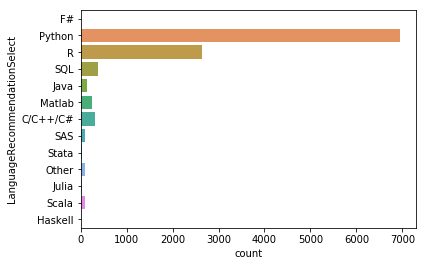

In [63]:
sns.countplot(y="LanguageRecommendationSelect", data=mcq)

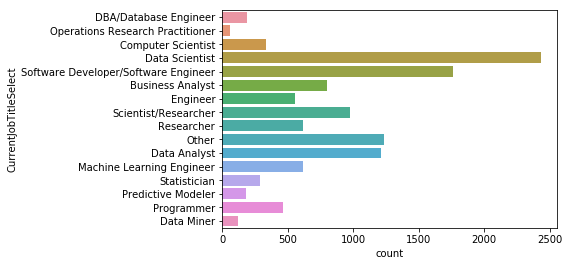

In [64]:
# mcq['CurrentJobTitleSelect']
sns.countplot(y=mcq['CurrentJobTitleSelect'])

In [65]:
# 현재 하고 있는 일에 대한 전체 응답수
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

(7158, 228)


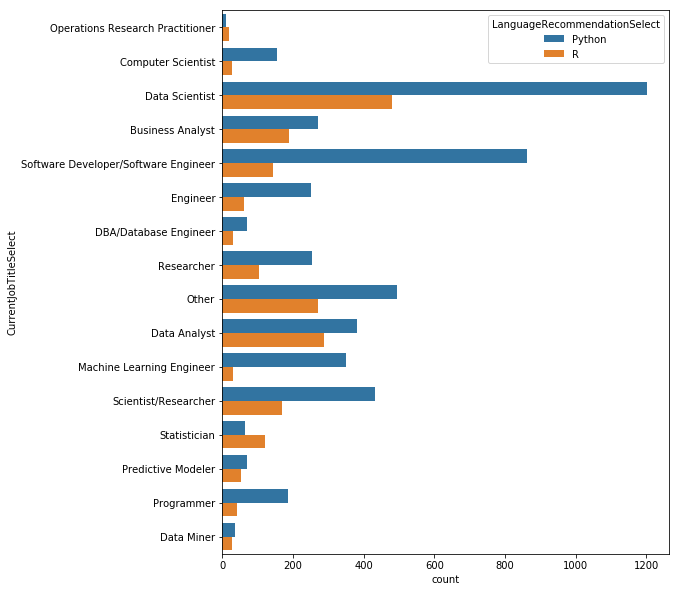

In [66]:
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
    (mcq['LanguageRecommendationSelect']=='Python') | (
     mcq['LanguageRecommendationSelect'] == 'R')
    )]
print(data.shape)
plt.figure(figsize=(8,10))
sns.countplot(y='CurrentJobTitleSelect',
              hue='LanguageRecommendationSelect',
              data=data)

* 비율로 따지면 좋을 듯

## Q2. 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까요?

### 데이터사이언스 툴

In [71]:
mcq_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize=True))
mcq_ml_tool_df = mcq_ml_tool_count.merge(
    mcq_ml_tool_percent, left_index =True, right_index=True).head(20)
mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

응답 수        비율
TensorFlow                                      2621  0.238316
Python                                          1713  0.155756
R                                                910  0.082742
Spark / MLlib                                    755  0.068649
Hadoop/Hive/Pig                                  417  0.037916
Other                                            407  0.037007
Amazon Machine Learning                          392  0.035643
Jupyter notebooks                                358  0.032551
I don't plan on learning a new tool/technology   341  0.031006
Google Cloud Compute                             296  0.026914
Amazon Web services                              273  0.024823
Julia                                            222  0.020185
DataRobot                                        220  0.020004
Microsoft Azure Machine Learning                 220  0.020004
IBM Watson / Waton Analytics                     194  0.017640
C/C++                                            186  0.016912
Tableau                                          150  0.013639
SQL                                              138  0.012548
Java                                             116  0.010547
MATLAB/Octave                                    115  0.010456

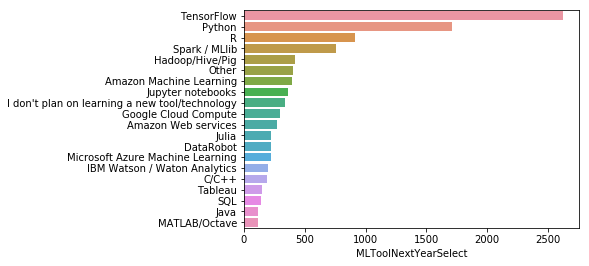

In [73]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

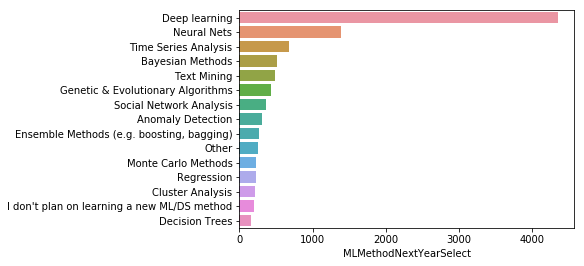

In [72]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

## Q3. 어디에서 데이터 사이언스를 배워야 할까요?

In [74]:
mcq['LearningPlatformSelect'].head(30)

0     College/University,Conferences,Podcasts,Trade ...
1                                                Kaggle
2     Arxiv,College/University,Kaggle,Online courses...
3     Blogs,College/University,Conferences,Friends n...
4                     Arxiv,Conferences,Kaggle,Textbook
5     Kaggle,Online courses,Stack Overflow Q&A,Textbook
6         Arxiv,Blogs,Kaggle,Personal Projects,Textbook
7     College/University,Kaggle,Online courses,Stack...
8     Blogs,Company internal community,Conferences,F...
9     Arxiv,Blogs,Conferences,Kaggle,Non-Kaggle onli...
10                                Kaggle,Online courses
11    Kaggle,Non-Kaggle online communities,Personal ...
12    College/University,Conferences,Kaggle,Online c...
13                                                  NaN
14    Blogs,Conferences,Kaggle,Online courses,Trade ...
15    Kaggle,Personal Projects,Podcasts,Stack Overfl...
16                                                  NaN
17                                              

In [76]:
mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(',')).head(4)

0    [College/University, Conferences, Podcasts, Tr...
1                                             [Kaggle]
2    [Arxiv, College/University, Kaggle, Online cou...
3    [Blogs, College/University, Conferences, Frien...
Name: LearningPlatformSelect, dtype: object

In [86]:
mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1).stack()#.reset_index(level=1, drop=True)

0      0                College/University
       1                       Conferences
       2                          Podcasts
       3                        Trade book
1      0                            Kaggle
2      0                             Arxiv
       1                College/University
       2                            Kaggle
       3                    Online courses
       4                    YouTube Videos
3      0                             Blogs
       1                College/University
       2                       Conferences
       3                   Friends network
       4            Official documentation
       5                    Online courses
       6                 Personal Projects
4      0                             Arxiv
       1                       Conferences
       2                            Kaggle
       3                          Textbook
5      0                            Kaggle
       1                    Online courses
       2   

In [90]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

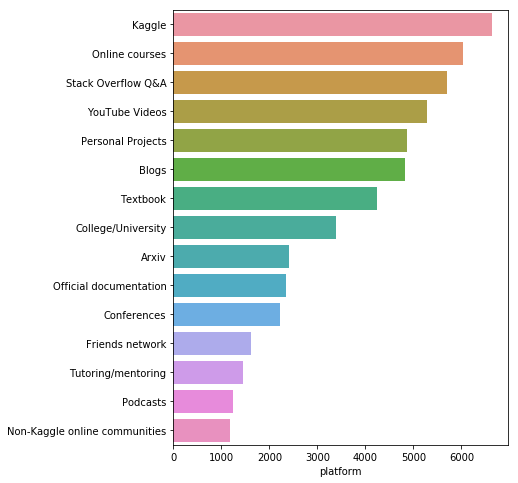

In [91]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

## Asked who

In [92]:
question.loc[question['Column'].str.contains('LearningCategory')]

Column  \
91    LearningCategorySelftTaught   
92  LearningCategoryOnlineCourses   
93           LearningCategoryWork   
94     LearningCategoryUniversity   
95         LearningCategoryKaggle   
96          LearningCategoryOther   
97  LearningCategoryOtherFreeForm   

                                             Question Asked  
91  What percentage of your current machine learni...   All  
92  What percentage of your current machine learni...   All  
93  What percentage of your current machine learni...   All  
94  What percentage of your current machine learni...   All  
95  What percentage of your current machine learni...   All  
96  What percentage of your current machine learni...   All  
97  What percentage of your current machine learni...   All

In [93]:

# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


Column  \
91    LearningCategorySelftTaught   
92  LearningCategoryOnlineCourses   
93           LearningCategoryWork   
94     LearningCategoryUniversity   
95         LearningCategoryKaggle   
96          LearningCategoryOther   
97  LearningCategoryOtherFreeForm   

                                             Question Asked  
91  What percentage of your current machine learni...   All  
92  What percentage of your current machine learni...   All  
93  What percentage of your current machine learni...   All  
94  What percentage of your current machine learni...   All  
95  What percentage of your current machine learni...   All  
96  What percentage of your current machine learni...   All  
97  What percentage of your current machine learni...   All

In [97]:
use_features = [x for x in mcq.columns if x.find(
    'LearningPlatformUsefulness') != -1]

In [98]:
use_features

['LearningPlatformUsefulnessArxiv',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessCollege',
 'LearningPlatformUsefulnessCompany',
 'LearningPlatformUsefulnessConferences',
 'LearningPlatformUsefulnessFriends',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessNewsletters',
 'LearningPlatformUsefulnessCommunities',
 'LearningPlatformUsefulnessDocumentation',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessPodcasts',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessTradeBook',
 'LearningPlatformUsefulnessTutoring',
 'LearningPlatformUsefulnessYouTube']

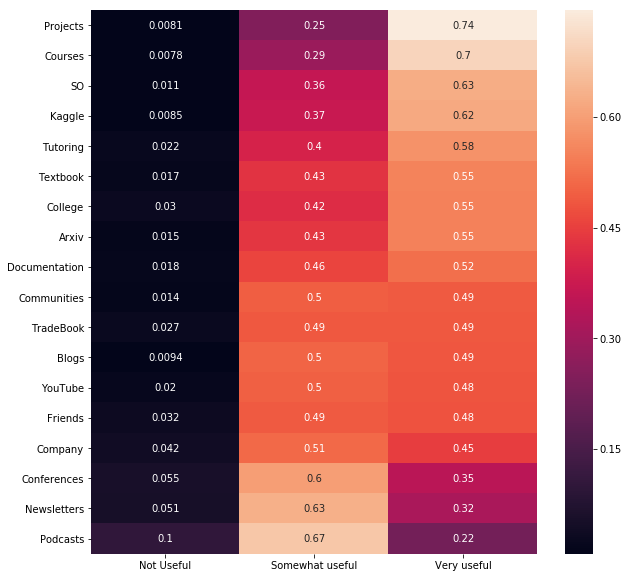

In [111]:
# 학습플랫폼과 유용함에 대한 연관성 살펴보기
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a
    
fdf = pd.DataFrame(fdf).transpose().sort_values(
    'Very useful', ascending=False)

# 학습플랫폼들이 얼마나 유용한지에 대한 상관관계를 그려본다.
plt.figure(figsize=(10,10))
sns.heatmap(
    fdf.sort_values(
        "Very useful", ascending=False), annot=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

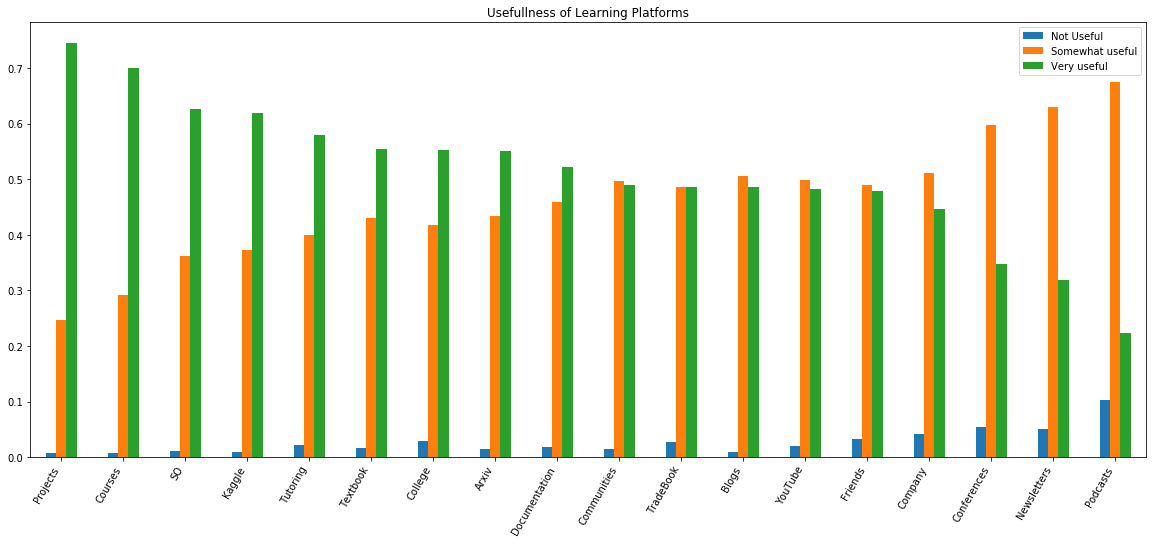

In [112]:
# 유용함의 정도를 각 플랫폼별로 그룹화 해서 본다.
fdf.plot(kind='bar', figsize=(20,8),
         title="Usefullness of Learning Platforms")
plt.xticks(rotation=60, ha='right')

In [113]:
cat_features = [x for x in mcq.columns if x.find(
    'LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [114]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

# 파이차트를 그리기 위해 평균 값을 구해와서 담아준다.
cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

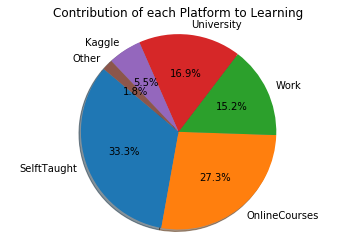

In [115]:
# 학습 플랫폼 별 도움이 되는 정도를 그려본다.
plt.pie(cdf, labels=cdf.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

## Q4.데이터과학을 위해 높은 사양의 컴퓨터가 필요한가요?

In [116]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


Column  \
74  HardwarePersonalProjectsSelect   

                                             Question     Asked  
74  Which computing hardware do you use for your p...  Learners

In [117]:

mcq[mcq['HardwarePersonalProjectsSelect'].notnull()][
    'HardwarePersonalProjectsSelect'].shape

(4206,)

In [118]:
mcq['HardwarePersonalProjectsSelect'
   ] = mcq['HardwarePersonalProjectsSelect'
          ].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: 
              pd.Series(x['HardwarePersonalProjectsSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

In [119]:
s = s[s != 'nan']

In [120]:
pd.DataFrame(s.value_counts())

hardware
Basic laptop (Macbook)                                  2246
 GCE ...)                                                669
 Azure                                                   669
Laptop + Cloud service (AWS                              669
Gaming Laptop (Laptop + CUDA capable GPU)                641
Traditional Workstation                                  527
Laptop or Workstation and local IT supported se...       445
GPU accelerated Workstation                              416
Workstation + Cloud service                              174
Other                                                    147

## Q5.데이터 사이언스 공부에 얼마나 많은 시간을 사용하는지?

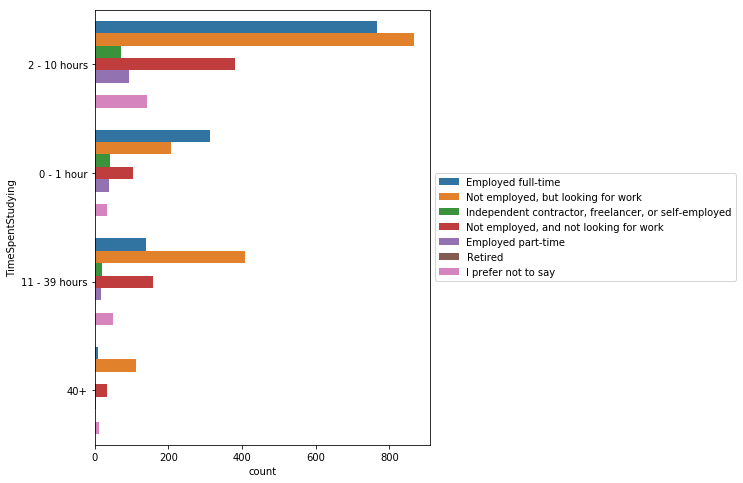

In [121]:
plt.figure(figsize=(6, 8))
sns.countplot(y='TimeSpentStudying', 
              data=mcq, 
              hue='EmploymentStatus'
             ).legend(loc='center left',
                      bbox_to_anchor=(1, 0.5))

In [123]:
mcq[mcq['EmploymentStatus']=='Employed full-time']

GenderSelect  \
0      Non-binary, genderqueer, or gender non-conforming   
4                                                   Male   
5                                                   Male   
6                                                   Male   
7                                                 Female   
8                                                 Female   
9                                                   Male   
11                                                  Male   
12                                                  Male   
13                                                  Male   
14                                                  Male   
16                                                  Male   
17                                                  Male   
22                                                  Male   
24                                                  Male   
25                                                  Male   
26                                                  Male   
27                                                  Male   
30                                                  Male   
31                                                  Male   
32                                                  Male   
33                                                  Male   
34                                                  Male   
37                                                  Male   
38                                                Female   
40                                                  Male   
41                                                  Male   
42                                                  Male   
44                                                  Male   
48                                                  Male   
51                                                  Male   
52                                                  Male   
54                                                Female   
55                                                  Male   
59                                                  Male   
62                                                  Male   
65                                                  Male   
67                                                  Male   
68                                                  Male   
71                                                Female   
72                                                  Male   
75                                                  Male   
78                                                  Male   
79                                                  Male   
80                                                  Male   
81                                                  Male   
82                                                  Male   
83                                                  Male   
86                                                Female   
87                                                Female   
88                                                  Male   
89                                                Female   
90                                                  Male   
91                                                  Male   
95                                                  Male   
96                                                  Male   
98                                                  Male   
99                                                  Male   
100                                               Female   
102                                                 Male   
106                                                 Male   
108                                                 Male   
111                                               Female   
114                                                 Male   
115                                                 Male   
119                                                 Male   
120                     

In [124]:
mcq['EmploymentStatus'].value_counts()

Employed full-time                                      10897
Not employed, but looking for work                       2110
Independent contractor, freelancer, or self-employed     1330
Not employed, and not looking for work                    924
Employed part-time                                        917
I prefer not to say                                       420
Retired                                                   118
Name: EmploymentStatus, dtype: int64

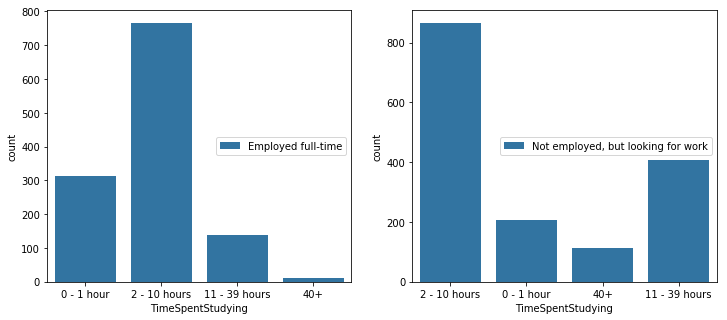

In [125]:
full_time = mcq[mcq['EmploymentStatus']=='Employed full-time']
looking_for_job = mcq[mcq['EmploymentStatus']=='Not employed, but looking for work']
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying', 
              data=full_time, 
              hue='EmploymentStatus', ax=ax1
             ).legend(loc='center right',
                      bbox_to_anchor=(1, 0.5))

sns.countplot(x='TimeSpentStudying', 
              data=looking_for_job, 
              hue='EmploymentStatus', ax=ax2
             ).legend(loc='center right',
                      bbox_to_anchor=(1, 0.5))

## Q6.블로그 , 팟캐스트, 수업, 기타 등등 추천할만한 것이 있는지?

In [126]:
mcq['BlogsPodcastsNewslettersSelect'] = mcq[
    'BlogsPodcastsNewslettersSelect'
].astype('str').apply(lambda x: x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [127]:
s = mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platforms'
s.head()

0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platforms, dtype: object

In [128]:
s = s[s != 'nan'].value_counts().head(20)

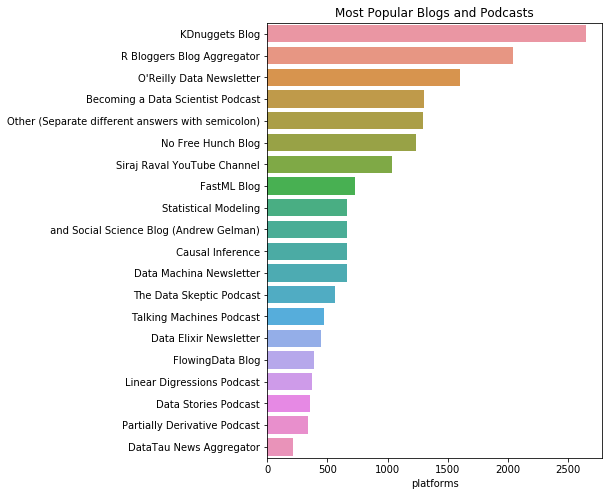

In [129]:
plt.figure(figsize=(6,8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y=s.index, x=s)

In [130]:
mcq['CoursePlatformSelect'] = mcq[
    'CoursePlatformSelect'].astype(
    'str').apply(lambda x: x.split(','))
mcq['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [131]:
t = mcq.apply(lambda x: pd.Series(x['CoursePlatformSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
t.name = 'courses'
t.head(20)

0          nan
1          nan
2     Coursera
2          edX
3          nan
4          nan
5          nan
6          nan
7     Coursera
8          nan
9          nan
10    Coursera
11         nan
12    Coursera
12    DataCamp
12         edX
13         nan
14         nan
15         nan
16         nan
Name: courses, dtype: object

In [132]:
t = t[t != 'nan'].value_counts()

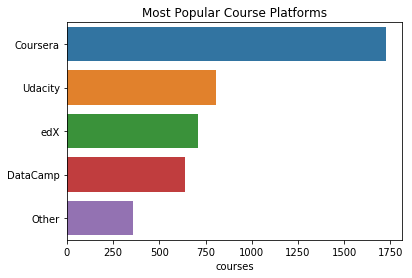

In [133]:
plt.title("Most Popular Course Platforms")
sns.barplot(y=t.index, x=t)

In [134]:
job_features = [
    x for x in mcq.columns if x.find(
        'JobSkillImportance') != -1 
    and x.find('JobSkillImportanceOther') == -1]

job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [135]:
jdf = {}
for feature in job_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jdf[feature[len('JobSkillImportance'):]] = a

jdf

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'Stats': Necessary       0.513889
 Nice to have    0.457576
 Unnecessary     0.028535
 Name: JobSkillImportanceStats, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have    0.491778
 Necessary       0.434224
 Unnecessary     0.073998
 Name: JobSkillImportanceSQL, dtype: float64,
 'KaggleRanking': Nice to have    0.677

In [136]:
jdf = pd.DataFrame(jdf).transpose()
jdf

Necessary  Nice to have  Unnecessary
BigData           0.379929      0.574065     0.046006
Degree            0.279867      0.598107     0.122026
Stats             0.513889      0.457576     0.028535
EnterpriseTools   0.144829      0.564970     0.290200
Python            0.645994      0.327214     0.026792
R                 0.414807      0.513945     0.071247
SQL               0.434224      0.491778     0.073998
KaggleRanking     0.118863      0.677261     0.203876
MOOC              0.107255      0.606994     0.285752
Visualizations    0.455392      0.490820     0.053788

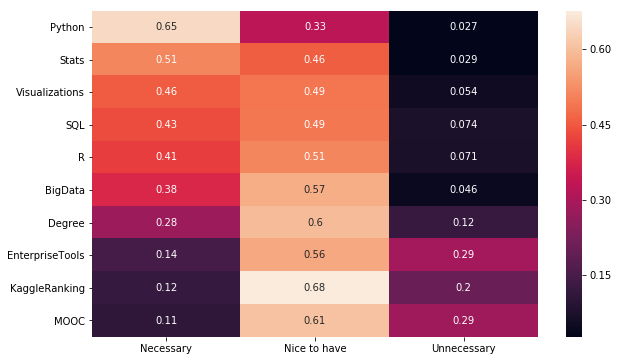

In [137]:

plt.figure(figsize=(10,6))
sns.heatmap(jdf.sort_values("Necessary", 
                            ascending=False), annot=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

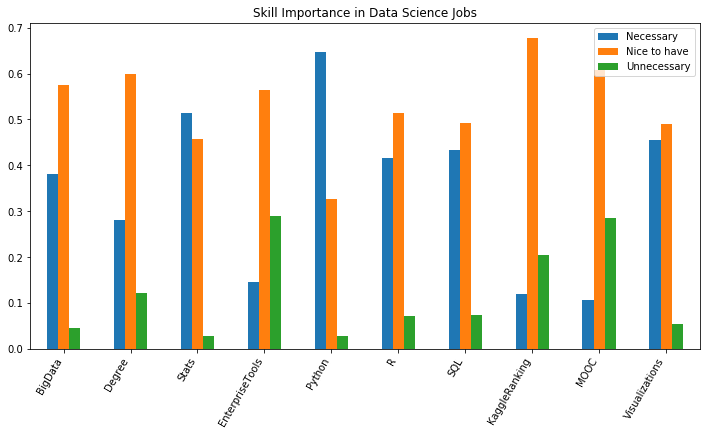

In [138]:
jdf.plot(kind='bar', figsize=(12,6), 
         title="Skill Importance in Data Science Jobs")
plt.xticks(rotation=60, ha='right')

In [139]:

mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [140]:
mcq['CompensationAmount'] = mcq[
    'CompensationAmount'].str.replace(',','')
mcq['CompensationAmount'] = mcq[
    'CompensationAmount'].str.replace('-','')

In [141]:
rates = pd.read_csv('../input/conversionRates.csv')
rates.drop('Unnamed: 0', axis=1, inplace=True)

In [145]:
salary = mcq[
    ['CompensationAmount','CompensationCurrency',
     'GenderSelect',
     'Country',
     'CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates,left_on='CompensationCurrency',
                      right_on='originCountry', how='left')
salary['Salary'] = pd.to_numeric(
    salary['CompensationAmount']) * salary['exchangeRate']
salary.head()

CompensationAmount CompensationCurrency GenderSelect        Country  \
0             250000                  USD         Male  United States   
1              80000                  AUD       Female      Australia   
2            1200000                  RUB         Male         Russia   
3              95000                  INR         Male          India   
4            1100000                  TWD         Male         Taiwan   

                  CurrentJobTitleSelect originCountry  exchangeRate    Salary  
0      Operations Research Practitioner           USD      1.000000  250000.0  
1                      Business Analyst           AUD      0.802310   64184.8  
2  Software Developer/Software Engineer           RUB      0.017402   20882.4  
3                        Data Scientist           INR      0.015620    1483.9  
4  Software Developer/Software Engineer           TWD      0.033304   36634.4

In [146]:

print('Maximum Salary is USD $',
      salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',
      salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',
      salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 208999999
Minimum Salary is USD $ -2147483648
Median Salary is USD $ 53812.0


Text(0.5,1,'Salary Distribution')

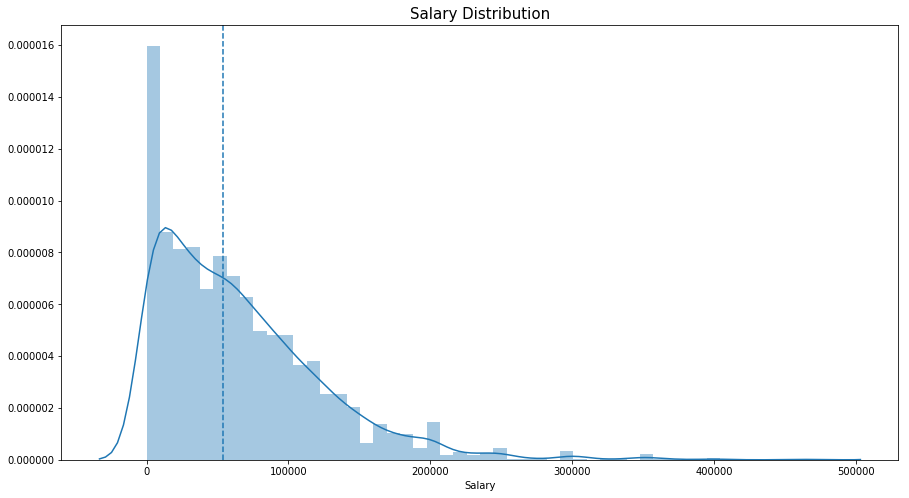

In [149]:
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']<1000000]
sns.distplot(salary['Salary'])
plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Salary Distribution',size=15)

Text(0.5,1,'Salary Distribution')

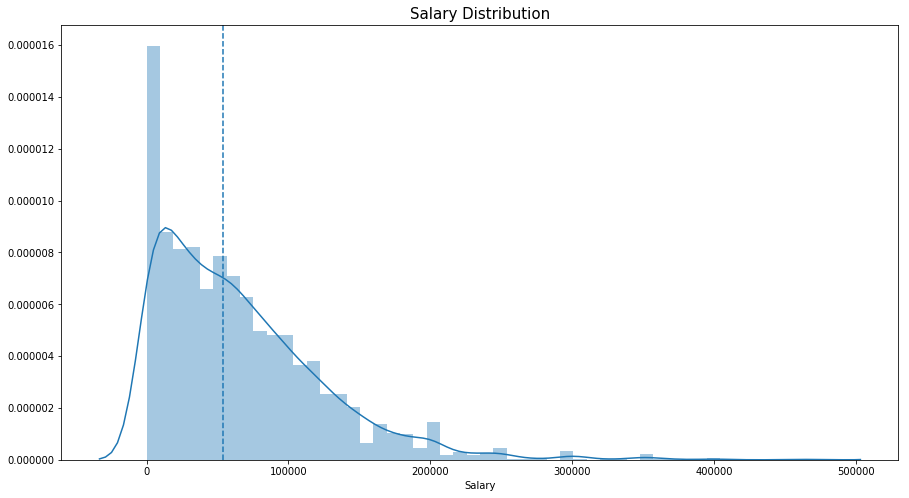

In [147]:
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']<500000]
sns.distplot(salary['Salary'])
plt.axvline(salary['Salary'].median(), linestyle='dashed')
# 중간값 표시
plt.title('Salary Distribution',size=15)

Text(0.5,1,'Highest Salary Paying Countries')

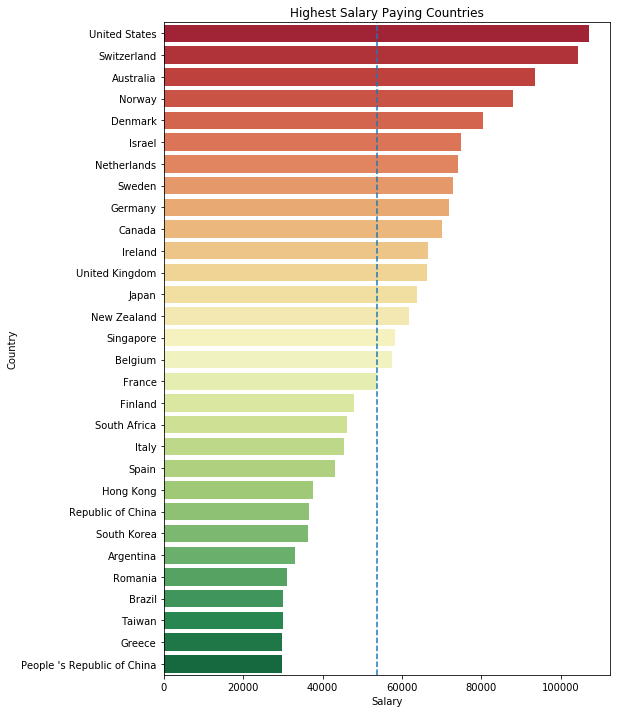

In [150]:
plt.subplots(figsize=(8,12))

sal_coun = salary.groupby(
    'Country')['Salary'].median().sort_values(
    ascending=False)[:30].to_frame()

sns.barplot('Salary', 
            sal_coun.index,
            data = sal_coun,
            palette='RdYlGn')

plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Highest Salary Paying Countries')

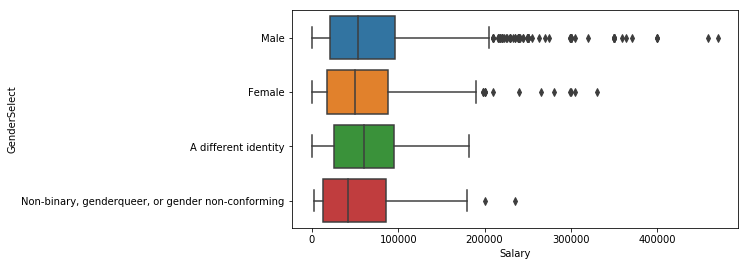

In [151]:
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary', data=salary)

* 인금격차는 그렇게 크지 않지만, 상위쪽은 격차가 쫌 있다.

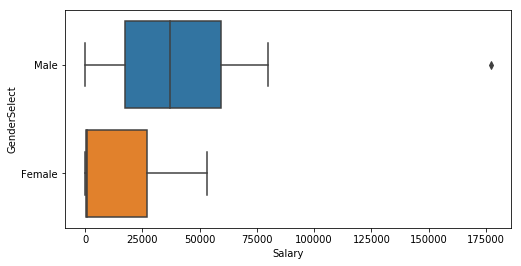

In [152]:
salary_korea = salary.loc[(salary['Country']=='South Korea')]
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary',data=salary_korea)

In [153]:
salary_korea.shape

(26, 8)

In [154]:
salary_korea[salary_korea['GenderSelect'] == 'Female']

CompensationAmount CompensationCurrency GenderSelect      Country  \
479               30000                  KRW       Female  South Korea   
2903             800000                  KRW       Female  South Korea   
4063           60000000                  KRW       Female  South Korea   

     CurrentJobTitleSelect originCountry  exchangeRate    Salary  
479           Data Analyst           KRW      0.000886     26.58  
2903            Researcher           KRW      0.000886    708.80  
4063            Researcher           KRW      0.000886  53160.00

In [155]:
salary_korea_male = salary_korea[
    salary_korea['GenderSelect']== 'Male']
salary_korea_male['Salary'].describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: Salary, dtype: float64

In [156]:
salary_korea_male

CompensationAmount CompensationCurrency GenderSelect      Country  \
85             40000000                  KRW         Male  South Korea   
147               80000                  USD         Male  South Korea   
314               60000                  USD         Male  South Korea   
333            60000000                  KRW         Male  South Korea   
562            50000000                  KRW         Male  South Korea   
769            42000000                  KRW         Male  South Korea   
799                1000                  KRW         Male  South Korea   
1060           75000000                  KRW         Male  South Korea   
1360           30000000                  KRW         Male  South Korea   
1568              90000                  SGD         Male  South Korea   
1576           10800000                  KRW         Male  South Korea   
1905              20000                  USD         Male  South Korea   
1945              50000                  KRW         Male  South Korea   
1949           80000000                  KRW         Male  South Korea   
2322          200000000                  KRW         Male  South Korea   
2334           60000000                  KRW         Male  South Korea   
2557            7200000                  KRW         Male  South Korea   
2924              15000                  USD         Male  South Korea   
3394           66000000                  KRW         Male  South Korea   
3832           30000000                  KRW         Male  South Korea   
3979           35000000                  KRW         Male  South Korea   
4300           60000000                  KRW         Male  South Korea   
4366              10000                  USD         Male  South Korea   

                     CurrentJobTitleSelect originCountry  exchangeRate  \
85                        Business Analyst           KRW      0.000886   
147                             Researcher           USD      1.000000   
314                       Business Analyst           USD      1.000000   
333                             Researcher           KRW      0.000886   
562                             Researcher           KRW      0.000886   
769   Software Developer/Software Engineer           KRW      0.000886   
799              Machine Learning Engineer           KRW      0.000886   
1060                  Scientist/Researcher           KRW      0.000886   
1360                          Statistician           KRW      0.000886   
1568                    Computer Scientist           SGD      0.742589   
1576                        Data Scientist           KRW      0.000886   
1905                            Researcher           USD      1.000000   
1945             Machine Learning Engineer           KRW      0.000886   
1949  Software Developer/Software Engineer           KRW      0.000886   
2322                                 Other           KRW      0.000886   
2334             Machine Learning Engineer           KRW      0.000886   
2557                            Researcher           KRW      0.000886   
2924                            Researcher           USD      1.000000   
3394                            Programmer           KRW      0.000886   
3832                        Data Scientist           KRW      0.000886   
3979                            Researcher           KRW      0.000886   
4300                  Scientist/Researcher           KRW      0.000886   
4366                        Data Scientist           USD      1.000000   

          Salary  
85     35440.000  
147    80000.000  
314    60000.000  
333    53160.000  
562    44300.000  
769    37212.000  
799        0.886  
1060   66450.000  
1360   26580.000  
1568   66833.010  
1576    9568.800  
1905   20000.000  
1945      44.300  
1949   70880.000  
2322  177200.000  
2334   53160.000  
2557    6379.200  
2924   15000.000  
3394   58476.000  
3832   26580.000  
3979   31010.000  
4300   53160.000  
4366   10000.0

## Q9. 개인프로젝트나 학습용 데이터를 어디에서 얻나요?

In [157]:
mcq['PublicDatasetsSelect'] = mcq[
    'PublicDatasetsSelect'].astype('str').apply(
    lambda x: x.split(',')
    )

In [158]:
q = mcq.apply(
    lambda x: pd.Series(x['PublicDatasetsSelect']),
    axis=1).stack().reset_index(level=1, drop=True)

q.name = 'courses'

In [160]:
q = q[q != 'nan'].value_counts()

In [161]:

pd.DataFrame(q)

courses
Dataset aggregator/platform (i.e. Socrata/Kaggl...     6843
Google Search                                          3600
University/Non-profit research group websites          2873
I collect my own data (e.g. web-scraping)              2560
GitHub                                                 2400
Government website                                     2079
Other                                                   399

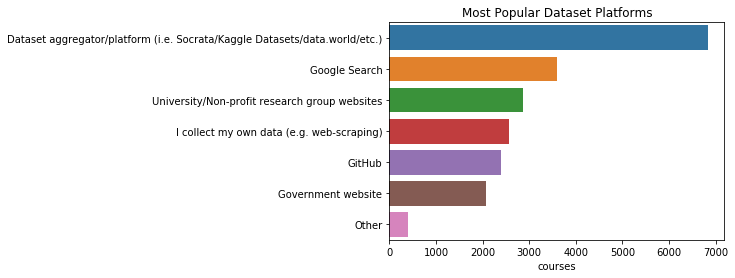

In [162]:
plt.title("Most Popular Dataset Platforms")
sns.barplot(y=q.index, x=q)

In [163]:
# 주관식 응답을 읽어온다.
ff = pd.read_csv('../input/freeformResponses.csv', 
                 encoding="ISO-8859-1", low_memory=False)
ff.shape

(16716, 62)

In [165]:
ff.head()

GenderFreeForm KaggleMotivationFreeForm CurrentJobTitleFreeForm  \
0            NaN                      NaN                     NaN   
1            NaN                      NaN                     NaN   
2            NaN                      NaN                 teacher   
3            NaN                      NaN                     NaN   
4            NaN                      NaN                     NaN   

  MLToolNextYearFreeForm MLMethodNextYearFreeForm  \
0                    NaN                      NaN   
1                    NaN                      NaN   
2                    NaN                      NaN   
3                    NaN                      NaN   
4                    NaN                      NaN   

  LanguageRecommendationFreeForm PublicDatasetsFreeForm  \
0                            NaN                    NaN   
1                            NaN                    NaN   
2                            NaN                    NaN   
3                            NaN                    NaN   
4                            NaN                    NaN   

            PersonalProjectsChallengeFreeForm  \
0                           Data manipulation   
1  I can't find time to practice consistently   
2                                         NaN   
3                    Connectivity/data fusion   
4                                         NaN   

  LearningPlatformCommunityFreeForm LearningPlatformFreeForm1  \
0                               NaN                       NaN   
1                               NaN                       NaN   
2                               NaN                   Meetups   
3                               NaN                       NaN   
4                               NaN                       NaN   

  LearningPlatformFreeForm2 LearningPlatformFreeForm3  \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                       NaN   
3                       NaN                       NaN   
4                       NaN                       NaN   

   LearningPlatformUsefulnessCommunitiesFreeForm  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  LearningPlatformUsefulnessFreeForm1Select  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   LearningPlatformUsefulnessFreeForm1SelectFreeForm  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

  LearningPlatformUsefulnessFreeForm2Select  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   LearningPlatformUsefulnessFreeForm2SelectFreeForm  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

  LearningPlatformUsefulnessFreeForm3Select  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   LearningPlatformUsefulnessFreeForm3SelectFree

In [164]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('PersonalProjectsChallengeFreeForm')]
print(qc.shape)
qc.Question.values[0]

(1, 3)


'What is your biggest challenge with the public datasets you find for personal projects?'

In [166]:
ppcff = ff[
    'PersonalProjectsChallengeFreeForm'].value_counts().head(15)
ppcff.name = '응답 수'
pd.DataFrame(ppcff)

응답 수
None                     23
Cleaning                 20
Cleaning the data        20
Dirty data               16
Data Cleaning            14
none                     13
dirty data               10
Data cleaning            10
-                         9
Size                      9
cleaning                  8
Incomplete data           8
Missing data              8
Lack of documentation     7
Na                        6

## Q11. 데이터 사이언스 업무에서 가장 많은 시간을 필요로 하는 일은? 

In [167]:
time_features = [
    x for x in mcq.columns if x.find('Time') != -1][4:10]

In [168]:
time_features

['TimeGatheringData',
 'TimeModelBuilding',
 'TimeProduction',
 'TimeVisualizing',
 'TimeFindingInsights',
 'TimeOtherSelect']

GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64



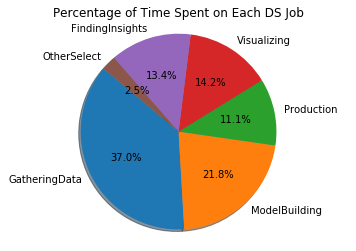

In [169]:
tdf = {}
for feature in time_features:
    tdf[feature[len('Time'):]] = mcq[feature].mean()

tdf = pd.Series(tdf)
print(tdf)
print()

plt.pie(tdf, labels=tdf.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of Time Spent on Each DS Job")
plt.show()

## Q11. 데이터사이언스 직업을 찾는데 가장 고려해야 할 요소는 무엇일까요?

In [170]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [171]:
job_factors = [
    x for x in mcq.columns if x.find('JobFactor') != -1]

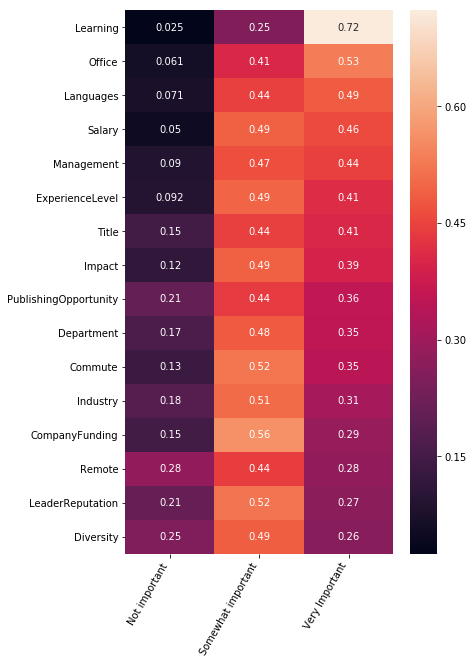

In [172]:
jfdf = {}
for feature in job_factors:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jfdf[feature[len('JobFactor'):]] = a

jfdf = pd.DataFrame(jfdf).transpose()

plt.figure(figsize=(6,10))
plt.xticks(rotation=60, ha='right')
sns.heatmap(jfdf.sort_values('Very Important', 
                             ascending=False), annot=True)

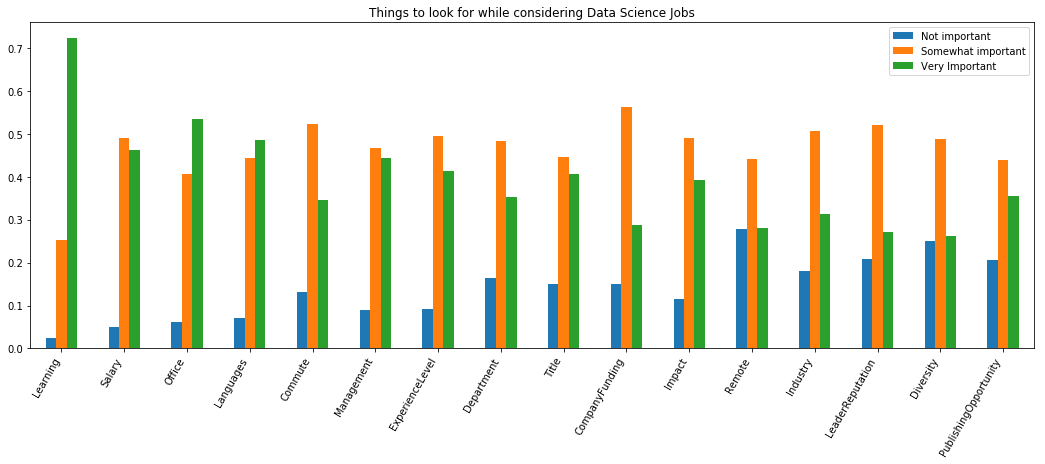

In [173]:

jfdf.plot(kind='bar', figsize=(18,6), 
          title="Things to look for while considering Data Science Jobs")
plt.xticks(rotation=60, ha='right')
plt.show()

## Q12. 데이터 사이언티스트가 되기 위해 학위가 중요할까?

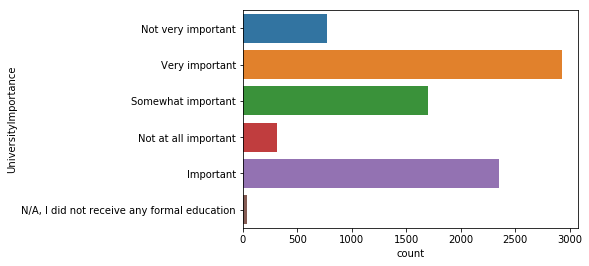

In [174]:
sns.countplot(y='UniversityImportance', data=mcq)

In [175]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.figure_factory as fig_fact

top_uni = mcq['UniversityImportance'].value_counts().head(5)
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(
        mcq[(mcq['Age'].notnull()) & \
            (mcq['UniversityImportance'] == uni)]['Age'])

group_labels = top_uni.index

fig = fig_fact.create_distplot(
    top_uni_dist, group_labels, show_hist=False)
py.iplot(fig, filename='University Importance by Age')


## Q13. 어디에서 부터 데이터사이언스를 시작해야 할까요?

In [176]:
mcq[mcq['FirstTrainingSelect'].notnull()].shape

(14712, 228)

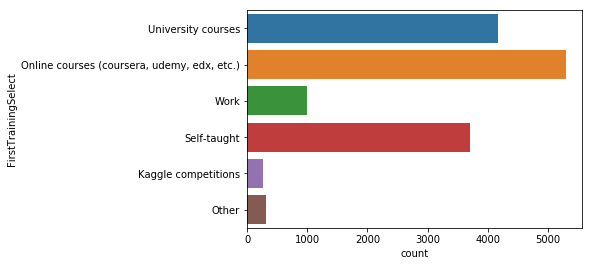

In [177]:

sns.countplot(y='FirstTrainingSelect', data=mcq)

## Q14. 데이터사이언티스트 이력서에서 가장 중요한 것은 무엇일까요?

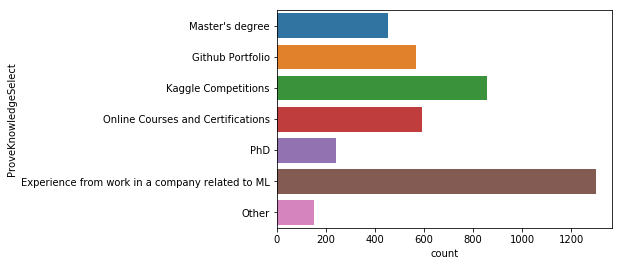

In [178]:
sns.countplot(y='ProveKnowledgeSelect', data=mcq)

## Q.15 머신러닝 알고리즘을 사용하기 위해 수학이 필요할까요?

In [179]:
qc = question.loc[question[
    'Column'].str.contains('AlgorithmUnderstandingLevel')]
qc

Column  \
227  AlgorithmUnderstandingLevel   

                                              Question         Asked  
227  At which level do you understand the mathemati...  CodingWorker

In [180]:
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

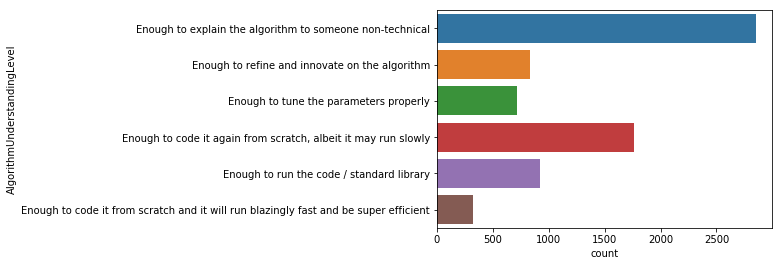

In [181]:
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcq)

## Q16. 어디에서 일을 찾아야 할까요?

In [182]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
question.loc[question[
    'Column'].str.contains(
    'JobSearchResource|EmployerSearchMethod')]

Column  \
108               EmployerSearchMethod   
109  EmployerSearchMethodOtherFreeForm   
271                  JobSearchResource   
272          JobSearchResourceFreeForm   

                                              Question            Asked  
108  How did you find your current job? - Selected ...  CodingWorker-NC  
109  How did you find your current job? - Some othe...  CodingWorker-NC  
271  Which resource has been the best for finding d...         Learners  
272  Which resource has been the best for finding d...         Learners

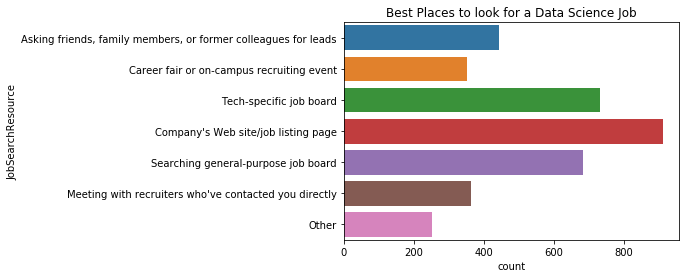

In [183]:
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=mcq)

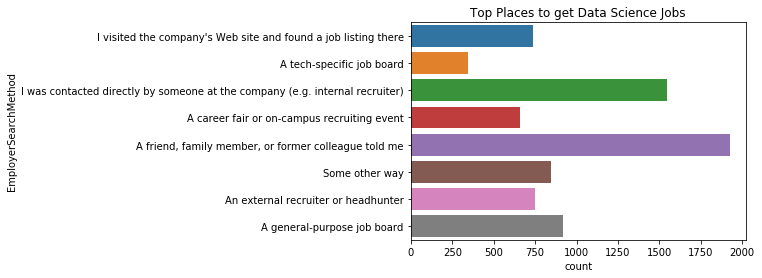

In [184]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=mcq)

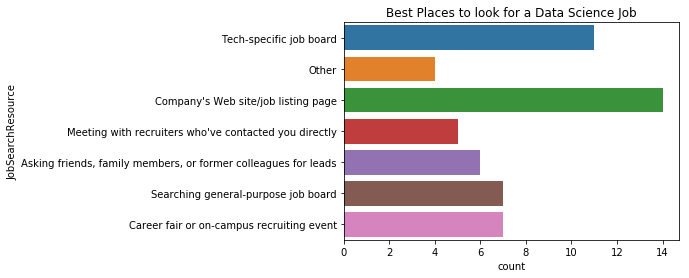

In [185]:
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=korea)

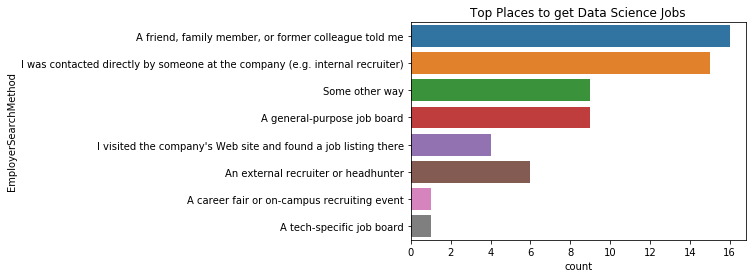

In [186]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=korea)

# 결론
이 설문결과로 Python이 R보다 훨씬 많이 사용됨을 알 수 있었다.
하지만 Python과 R을 모두 사용하는 사람도 많다.
데이터 수집과 정제는 어려운 일이다.(공감)
인기있는 학습플랫폼과 블로그, 유튜브 채널, 팟캐스트 등을 알게 되었다.
내년에 인기있는 기술로는 딥러닝과 텐서플로우가 큰 차지를 할 것이다.